Current Progress: 100.0 %
The old training dataframe shape: (2932, 44)
Total number of outliers identified is:  147
The new training dataframe shape: (2785, 44)
Accuracy = 0.92
Mean Error = 2.33
Bias = 5.11
Variance = 0.30


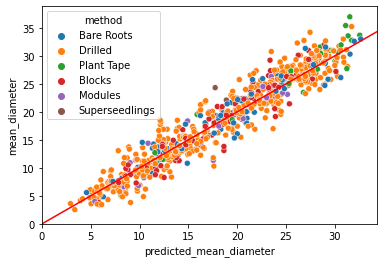

In [1]:
# Run preprocessing script to make dataframe objects available.

%run EvalEnsRegression.ipynb

In [2]:
zone_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 843 entries, 0 to 842
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   field                      843 non-null    object        
 1   zone                       843 non-null    int32         
 2   planting_date              843 non-null    datetime64[ns]
 3   variety                    843 non-null    object        
 4   method                     843 non-null    object        
 5   inputs                     843 non-null    object        
 6   protection                 843 non-null    object        
 7   planting_rate              843 non-null    int64         
 8   sand                       843 non-null    int64         
 9   silt                       843 non-null    int64         
 10  clay                       843 non-null    int64         
 11  organic_matter             843 non-null    float64       
 12  harvest_

In [3]:
planting_data = zone_data.copy()[['fieldvariety',
                                  'planting_date',
                                  'variety',
                                  'method',
                                  'inputs',
                                  'protection',
                                  'sand',
                                  'silt',
                                  'clay',
                                  'organic_matter',
                                  'mean_pp2m2',
                                  'max_heat',
                                  'max_solar',
                                  'remaining_heat',
                                  'remaining_solar',
                                  ]]



planting_data['heat_units'] = planting_data['max_heat'] + planting_data['remaining_heat']
planting_data['solar_radiation'] = planting_data['max_solar'] + planting_data['remaining_solar']

planting_data = planting_data.groupby(['fieldvariety']).agg({'planting_date' : ['first'],
                                                             'method' : ['first'],
                                                             'inputs' : ['first'],
                                                             'variety' : ['first'],
                                                             'protection' : ['first'],
                                                             'sand' : ['mean'],
                                                             'silt' : ['mean'],
                                                             'clay' : ['mean'],
                                                             'organic_matter' : ['mean'],
                                                             'mean_pp2m2' : ['mean'],
                                                             'heat_units' : ['mean'],
                                                             'solar_radiation' : ['mean']}).reset_index()

planting_data.columns = ['fieldvariety',
                         'planting_date',
                         'method',
                         'inputs',
                         'variety',
                         'protection',
                         'sand',
                         'silt',
                         'clay',
                         'organic_matter',
                         'pp2m2',
                         'heat_units',
                         'solar_radiation']



In [4]:
print(planting_data.shape)
planting_data

(344, 13)


,fieldvariety,planting_date,method,inputs,variety,protection,sand,silt,clay,organic_matter,pp2m2,heat_units,solar_radiation
0,Allans 06 - Krypton,2021-04-10,Drilled,Conventional,Krypton,Barley,40.000000,41.000000,19.000000,24.600000,40.000000,2360.500000,1.657460e+06
1,Allans 07 - Batter,2019-04-01,Drilled,Conventional,Batter,Barley,39.000000,37.000000,24.000000,29.600000,46.333333,2489.000000,1.615280e+06
2,Allans 07 - Krypton,2019-04-01,Drilled,Conventional,Krypton,Barley,39.000000,37.000000,24.000000,29.600000,43.250000,2464.000000,1.600496e+06
3,Allans 07 - Longton,2019-04-01,Drilled,Conventional,Longton,Barley,39.000000,37.000000,24.000000,29.600000,45.125000,2464.000000,1.600496e+06
4,Allans 08/09 - Chiefton,2021-04-13,Drilled,Conventional,Chiefton,Barley,39.000000,43.000000,18.000000,17.000000,35.166667,2419.185000,1.645863e+06
5,Allans 11 - Batter,2021-04-12,Drilled,Conventional,Batter,Barley,36.000000,44.000000,20.000000,18.300000,42.892857,2480.000000,1.700628e+06
6,Allans 12 - Longton,2020-05-02,Drilled,Conventional,Longton,Barley,27.000000,45.000000,28.000000,32.800000,41.107143,2617.908333,2.015033e+06
7,Allans 15 - Chiefton,2022-04-09,Drilled,Conventional,Chiefton,Barley,45.000000,47.000000,8.000000,20.000000,40.000000,2507.705640,1.675919e+06
8,Allans 16/17 - Batter,2020-05-03,Drilled,Conventional,Batter,Barley,35.000000,38.000000,27.000000,23.800000,43.428571,2593.000000,1.948914e+06
9,Allans 16/17 - Chiefton,2020-05-03,Drilled,Conventional,Chiefton,Barley,35.000000,38.000000,27.000000,23.800000,39.400000,2422.425000,1.748418e+06


In [5]:
# This replaces any varieties that haven't been grown yet with Chiefton.
# Otherewise dummy coding will create an unknown feature

planting_varieties = list(set(planting_data['variety']))
grown_varieties = list(set(summary_data_avg['variety']))
ungrown_varieties = list()

for i in planting_varieties:
    if i not in grown_varieties:
        ungrown_varieties.append(i)

for variety in ungrown_varieties:
    planting_data.loc[planting_data['variety'] == variety, 'variety'] = 'Chiefton'

In [6]:
indicator_data = trns.transform(planting_data[indicator_variables_list_1].copy())

indicator_data.head()

,pp2m2,heat_units,solar_radiation,organic_matter,method_Bare Roots,method_Blocks,method_Drilled,method_Modules,method_Plant Tape,method_Superseedlings,variety_Autura,variety_Avastar,variety_Batter,variety_Belton,variety_Chiefton,variety_Comanche,variety_Defender,variety_Fencer,variety_Galvani,variety_Gostar,variety_Harston,variety_Krypton,variety_Lancaster,variety_Laston,variety_Lexton,variety_Likestar,variety_Linkton,variety_Longton,variety_Nun 70406,variety_Oslo,variety_Pluston,variety_Runner,variety_Shafton,variety_Spheros,variety_Stromboli,variety_Sumstar,variety_Triton,inputs_Baby,inputs_Conventional,inputs_Organic,protection_Barley,protection_Fleece,protection_None,protection_Poly
0,40.000000,2360.500,1657459.5,24.6,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
1,46.333333,2489.000,1615280.0,29.6,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
2,43.250000,2464.000,1600496.0,29.6,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
3,45.125000,2464.000,1600496.0,29.6,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
4,35.166667,2419.185,1645863.0,17.0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0


In [7]:
preds = ens.predict(indicator_data)

planting_data['predictions'] = preds
planting_data = planting_data.sort_values(by=['method', 'fieldvariety'])
planting_data = planting_data.loc[(planting_data['planting_date'] > season)]

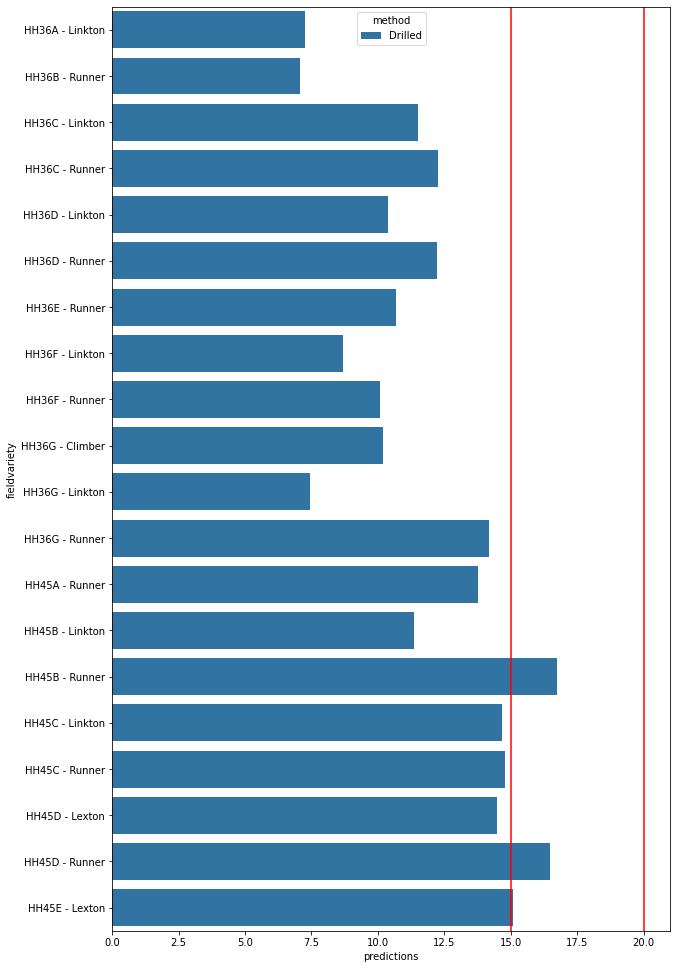

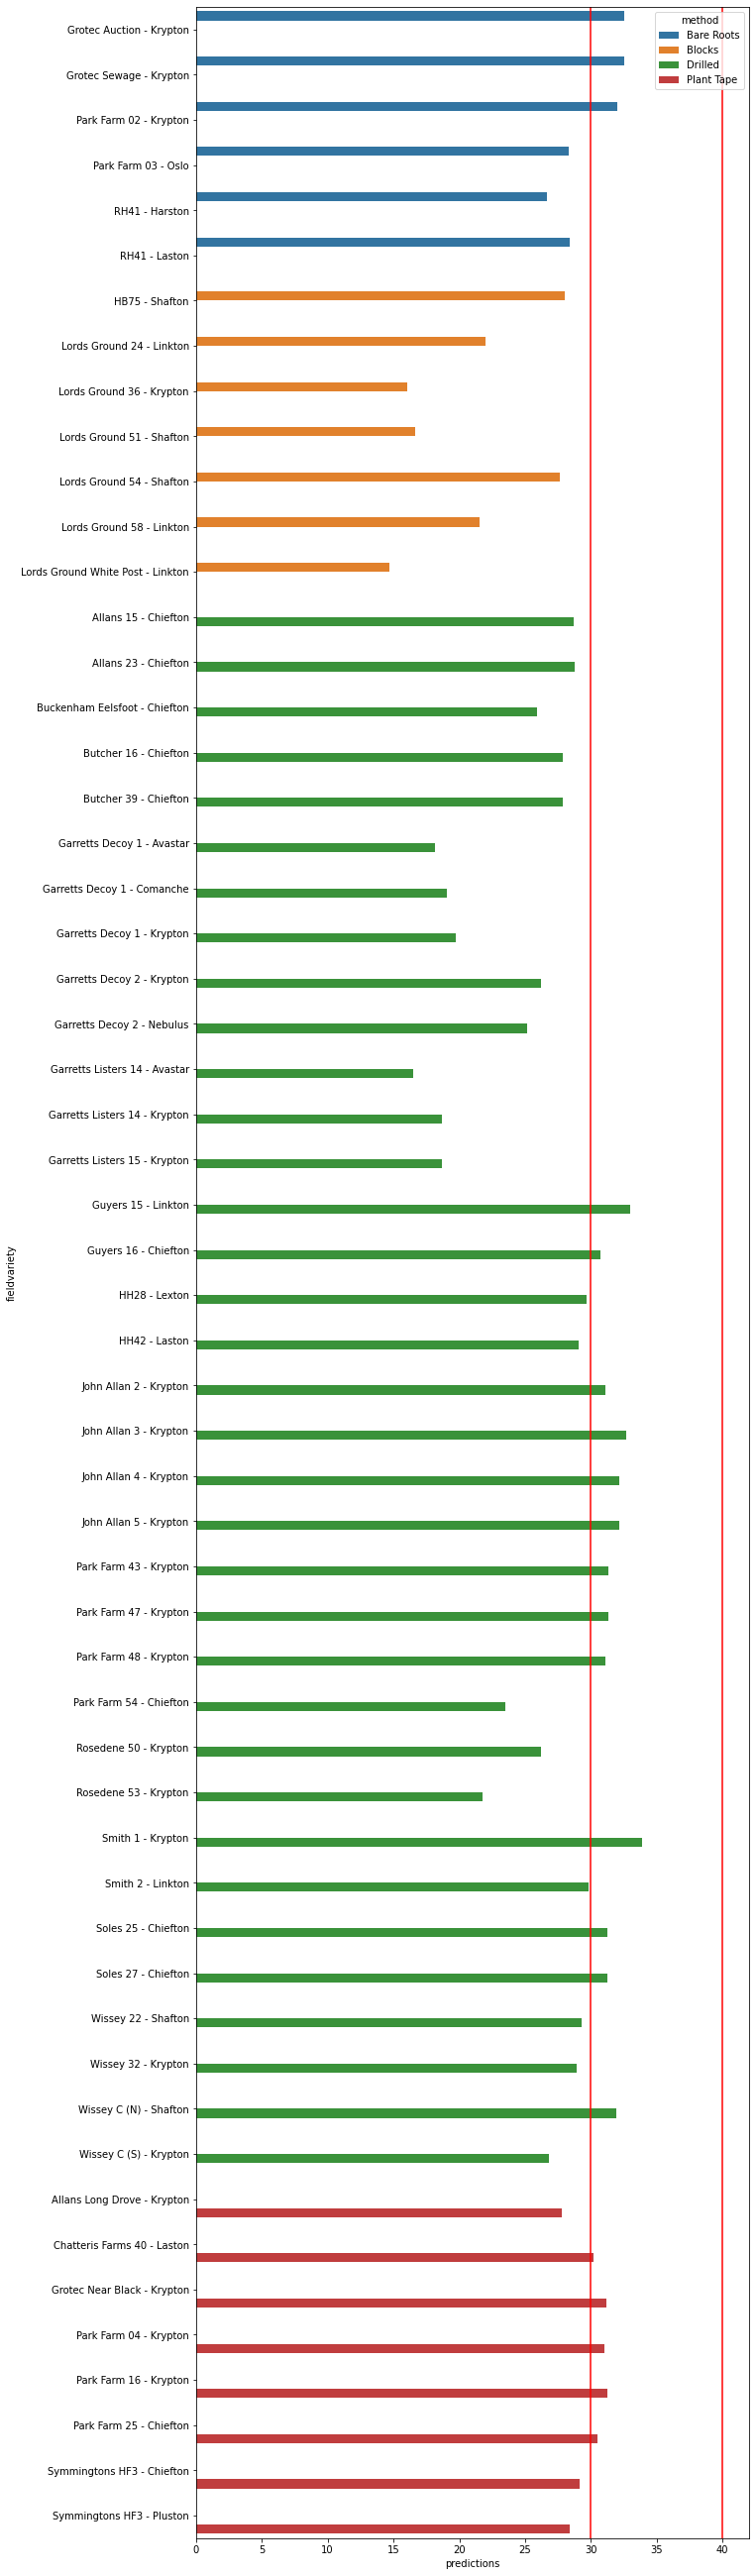

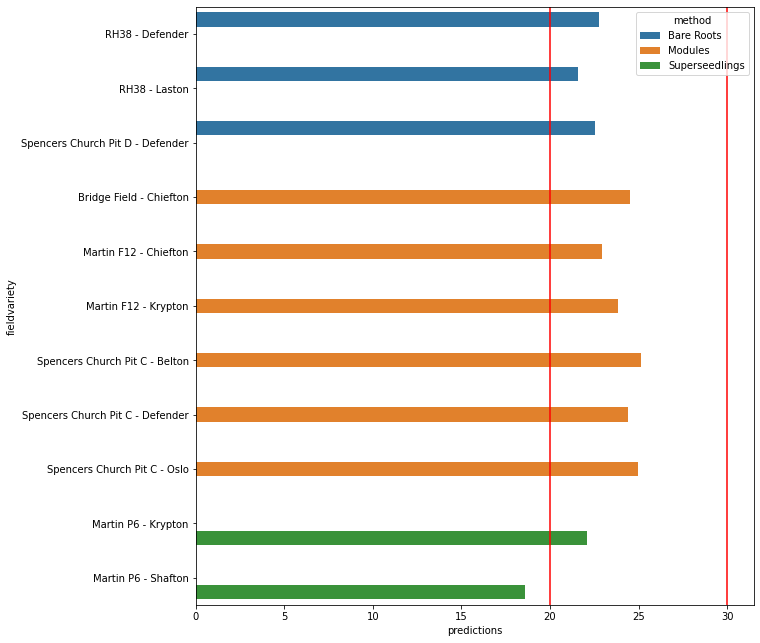

In [8]:
for method, a, b, c in [('Baby', 17, 15, 20), ('Conventional', 47, 30, 40), ('Organic', 11, 20, 30)]:
    fig, ax = plt.subplots(figsize=(10, a))
    ax = sns.barplot(y='fieldvariety', x='predictions', data = planting_data[(planting_data.inputs == f"{method}")], hue = 'method', orient = "h")
    plt.axvline(x = b, color = 'red')
    plt.axvline(x = c, color = 'red')
    plt.savefig(f'Predictions - {method}.png', dpi=300, bbox_inches = 'tight')
    plt.show()